<a href="https://colab.research.google.com/github/kevinmatsui/LocalitySensitiveHashing/blob/main/LocalitySensitiveHashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSH And Distances
.. Angular and Hashed Approximations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

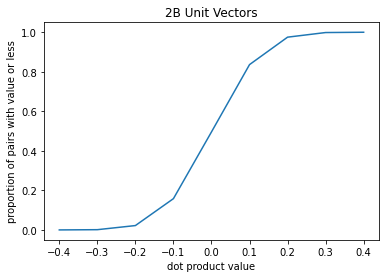

[0.0, 0.001206030150753769, 0.022010050251256283, 0.15819095477386935, 0.4957286432160804, 0.8361809045226131, 0.9750753768844221, 0.9984422110552764, 0.9999497487437186]


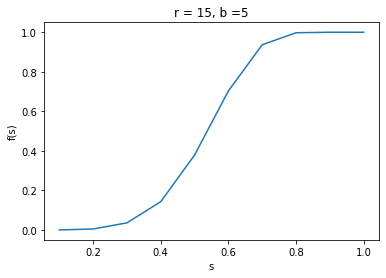

[0.9912141051617424, 0.014548724209751396, 0.057121886331857996, 0.004789262895136814, 0.5391055254498917, 0.9999995761026342]


In [ ]:
def unitVec(dimensions):
  vect = []
  times = int(dimensions/2)
  for x in range(times):
      u1 = np.random.uniform(0,1)
      u2 = np.random.uniform(0,1)
      y1 = ((math.log(u1)*-2)**0.5) * math.cos(2*math.pi*u2)
      y2 = ((math.log(u1)*-2)**0.5) * math.sin(2*math.pi*u2)
      vect.append(y1)
      vect.append(y2)

  vector = np.array(vect)
  unit_vector = vector/np.linalg.norm(vector)
  return unit_vector



all_vectors = []
for x in range(200):
  all_vectors.append(unitVec(100))


dot_products = []
for x in range(200):
  for y in range(x,200):
    if x != y:  
      dot_products.append(np.dot(all_vectors[x],all_vectors[y]))

yax = []
for x in range(-4,5):
  count= 0
  x = x*.1
  for y in range(len(dot_products)):
    if dot_products[y] <= x:
      count+=1
  frac = count/len(dot_products)
  yax.append(frac)



def similarityProb(s, b, r):
  val = (1-(s**b))**r
  val = 1 - val
  return val

xaxis = [-.4,-.3,-.2,-.1,0,.1,.2,.3,.4]
plt.plot(xaxis, yax)
  
# naming the x axis
plt.xlabel('dot product value')
# naming the y axis
plt.ylabel('proportion of pairs with value or less')
  
# giving a title to my graph
plt.title('2B Unit Vectors')
  
# function to show the plot
plt.show()

print(yax)

xaxistest = [0.1,0.2,0.3,.4,.5,.6,.7,.8,.9,1.0]
yaxtest = []
yaxtest.append(similarityProb(0.1,5,15))
yaxtest.append(similarityProb(0.2,5,15))
yaxtest.append(similarityProb(0.3,5,15))
yaxtest.append(similarityProb(0.4,5,15))
yaxtest.append(similarityProb(0.5,5,15))
yaxtest.append(similarityProb(0.6,5,15))
yaxtest.append(similarityProb(0.7,5,15))
yaxtest.append(similarityProb(0.8,5,15))
yaxtest.append(similarityProb(0.9,5,15))
yaxtest.append(similarityProb(1.0,5,15))

plt.plot(xaxistest, yaxtest)
  
# naming the x axis
plt.xlabel('s')
# naming the y axis
plt.ylabel('f(s)')
  
# giving a title to my graph
plt.title('r = 15, b =5')
  
# function to show the plot
plt.show()

yansw = []
yansw.append(similarityProb(0.77,5,15))
yansw.append(similarityProb(0.25,5,15))
yansw.append(similarityProb(0.33,5,15))
yansw.append(similarityProb(0.2,5,15))
yansw.append(similarityProb(0.55,5,15))
yansw.append(similarityProb(0.91,5,15))
print(yansw)

500
500
124750
0.6879562752395512
0.9940685592606638
107004


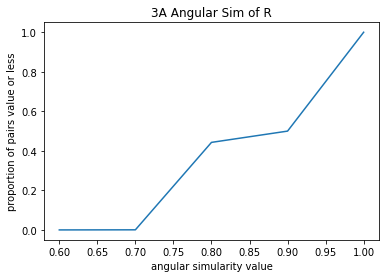

19900
0.3425352226707282
0.6192579482483638
0


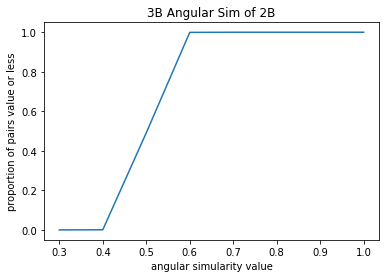

In [ ]:
def angSimil(dotproduct):
  val = 1- ((1/math.pi)*np.arccos(dotproduct))
  return val

lines = open("R.txt").read().splitlines()
print(len(lines))
nplines = np.asarray(lines)
datavals = []
for x in range(500):
  vecy = np.array(np.asarray(lines[x].split()).astype(float))
  normvec = vecy/np.linalg.norm(vecy)
  datavals.append(normvec)

dot_prods = []
print(len(datavals))
for x in range(500):
  for y in range(x,500):
    if x != y:  
      dot_prods.append(np.dot(datavals[x],datavals[y]))
print(len(dot_prods))
angsims = []
for x in range(len(dot_prods)):
  angsims.append(angSimil(dot_prods[x]))

print(min(angsims))
print(max(angsims))
aboveCount = 0
yax = []
for x in range(6,11):
  count= 0
  x = x*.1
  aboveCount = 0
  for y in range(len(angsims)):
    if angsims[y] > 0.75:
      aboveCount += 1
    if angsims[y] <= x:
      count+=1
  frac = count/len(angsims)
  yax.append(frac)
  

print(aboveCount)
xaxis = [.6,.7,.8,.9,1.0]
plt.plot(xaxis, yax)
  
# naming the x axis
plt.xlabel('angular simularity value')
# naming the y axis
plt.ylabel('proportion of pairs value or less')
  
# giving a title to my graph
plt.title('3A Angular Sim of R')
  
# function to show the plot
plt.show()




angsims1  = []

for x in range(len(dot_products)):
    angsims1.append(angSimil(dot_products[x]))

print(len(angsims1))
print(min(angsims1))
print(max(angsims1))

aboveCount = 0
yax = []
for x in range(3,11):
  count= 0
  x = x*.1
  aboveCount = 0
  for y in range(len(angsims1)):
    if angsims1[y] > 0.75:
      aboveCount += 1
    if angsims1[y] <= x:
      count+=1
  frac = count/len(angsims1)
  yax.append(frac)
  

print(aboveCount)
xaxis = [.3,.4,.5,.6,.7,.8,.9,1.0]
plt.plot(xaxis, yax)
  
# naming the x axis
plt.xlabel('angular simularity value')
# naming the y axis
plt.ylabel('proportion of pairs value or less')
  
# giving a title to my graph
plt.title('3B Angular Sim of 2B')
  
# function to show the plot
plt.show()